# Estimating Real-Time SARS-CoV-2 Cases
based on a video by CaryKH
https://www.youtube.com/watch?v=LnQcbAKWkPE

first download the "covid_19_clean_complete.csv" from https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

and place it in a new directory named 'data' (in the same folder as this notebook)

In [1]:
# load the deaths, recovered, and infected cases
import pandas as pd
import numpy as np
data = pd.read_csv('data/covid_19_clean_complete.csv')

In [2]:
death = data.Deaths
recov = data.Recovered
confr = data.Confirmed
count = data['Country/Region']

you can repurpose this bit of code for whatever country you want to predict for

In [44]:
USA = {
    'death': [],
    'recov': [],
    'confr': [],
    'dates': []
}

In [45]:
for i in range(len(count)):
    if(count[i]=='US'):
        USA['death'].append(death[i])
        USA['recov'].append(recov[i])
        USA['confr'].append(confr[i])
        USA['dates'].append(data.Date[i])

In [46]:
from custom import distribution, downsample_1d, round_arr, mid_distribution
# mean of 10 days and stdev of 3, derived from CARYKH

assuming the average number of days before showing symptoms is 6,

and the average wait period before getting test results is four days,

we get a mean of 10 days wait

In [47]:
curve = distribution(mean=10, stdev=3, samples=10, sample_depth=200, integer=True)
curve

[6, 9, 10, 12, 14, 14, 12, 10, 9, 6]

In [48]:
# find mid value with curve[int(round(len(curve)/2))]

we'll make a curve with the samples equal to however many NEW cases every single day, and add a case however far back the index on the curve puts it

In [49]:
new_cases = []
for i in range(len(USA['confr'])-1):
    new_cases.append(USA['confr'][i]-USA['confr'][i-1])

Text(0.5, 1.0, 'Confirmed Cases of SARS-CoV-2 per Day')

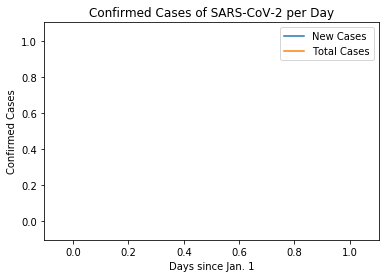

In [50]:
import matplotlib.pyplot as plt
b = 1
plt.plot(range(len(USA['confr'])-1)[b:], new_cases[b:], label='New Cases')
plt.plot(range(len(USA['confr'])-1)[b:], USA['confr'][2:], label='Total Cases')
plt.legend()
plt.xlabel('Days since Jan. {}'.format(b))
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases of SARS-CoV-2 per Day")

Text(0.5, 1.0, 'Confirmed Cases of SARS-CoV-2 per Day')

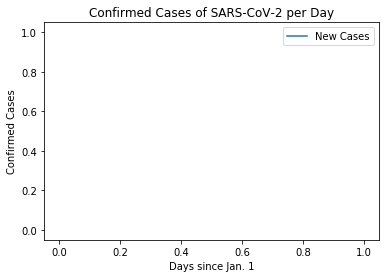

In [51]:
plt.plot(range(len(USA['confr'])-1)[b:], new_cases[b:], label='New Cases')
plt.legend()
plt.xlabel('Days since Jan. {}'.format(b))
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases of SARS-CoV-2 per Day")

In [39]:
# this throws an error but it's fine

est_cases = np.zeros(len(new_cases)-1)
for i in range(len(est_cases)-1):
    nc = new_cases[1:]
    
    # if we want to do the same with total cases we can go
    #     nc = USA['confr']
    # but im not sure we want to im not sure why you would
    
    nc_curve = distribution(mean=10, stdev=3, samples=nc[i], sample_depth=10, integer=True)
    
    
    if(i%5==0):
        print("-"*10)
        print(i, len(nc_curve))
        
    for j in range(len(nc_curve)-1):
        if(i-nc_curve[j]>0 and i-nc_curve[j]<len(nc_curve) and j<len(nc_curve)):
            
            if(nc_curve[int(round(len(nc_curve)/2))]>=i-nc_curve[j] and j<len(nc_curve)): # this part because the other side of the curve needs to be higher i dont know how to explain it just trust me it's what you gotta do for it
                est_cases[i-nc_curve[j]+nc_curve[int(round(len(nc_curve)/2))]]+=1
            else:
                est_cases[i-nc_curve[j]]+=1
            
#             if(j%100==0):
#                 print("J: " + str(j))

----------
0 0
----------
5 0
----------
10 3
----------
15 1
----------
20 0
----------
25 1
----------
30 229
----------
35 505
----------
40 851
----------
45 273
----------
50 110
----------
55 93
----------
60 0
----------
65 146
----------
70 89
----------
75 47
----------
80 32
----------
85 22
----------
90 11


the last cell threw an error i don't care to fix but everything is working perfectly fine

the error is just "cosmetic" ig

yeah its the graph yeah yeah


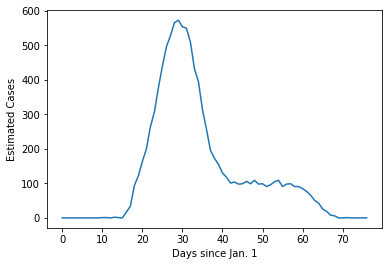

In [40]:
plt.plot(range(len(est_cases))[:-16], est_cases[:-16])
plt.xlabel('Days since Jan. {}'.format(b))
plt.ylabel('Estimated Cases')
print('yeah its the graph yeah yeah')

yeah graph oh yeah yeah its the graph its the graph yeah graph oh yeah graph


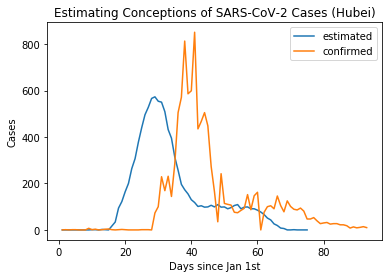

In [41]:
plt.plot(range(len(est_cases))[1:-17], est_cases[1:-17], label="estimated")
plt.plot(range(len(USA['confr'])-1)[1:], new_cases[1:], label="confirmed")
plt.title("Estimating Conceptions of SARS-CoV-2 Cases")
plt.ylabel("Cases")
plt.xlabel("Days since Jan 1st")
plt.legend()
print('yeah graph oh yeah yeah its the graph its the graph yeah graph oh yeah graph')

In [42]:
# now the rate of growth for new cases per day
# rate = current/yesterday new cases
rates = []
for i in range(len(new_cases)-1):
    ind = i+1
    
    if(new_cases[i]>0 and new_cases[ind]>0):
        rates.append(new_cases[i]/new_cases[ind])
    else:
        rates.append(0)

yeah graph oh woo yeah yeah its the graph woo its the graph yeah woo graph oh woo yeah graph


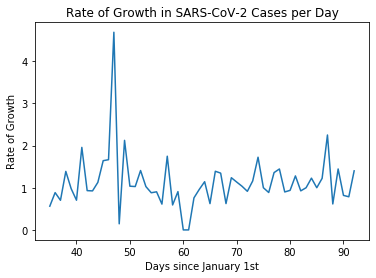

In [43]:
b = 35
plt.plot(range(len(new_cases)-1)[b:], rates[b:])
plt.xlabel("Days since January 1st")
plt.ylabel("Rate of Growth")
plt.title("Rate of Growth in SARS-CoV-2 Cases per Day")
print('yeah graph oh woo yeah yeah its the graph woo its the graph yeah woo graph oh woo yeah graph')

### shitting around

In [123]:
rates2 = []
for i in range(len(rates)-1):
    ind = i+1
    
    if(new_cases[i]>0 and rates[ind]>0):
        rates2.append(rates[i]/rates[ind])
    else:
        rates2.append(0)

yeah graph oh woo yeah yeah its the graph woo its the graph yeah woo graph oh woo yeah graph


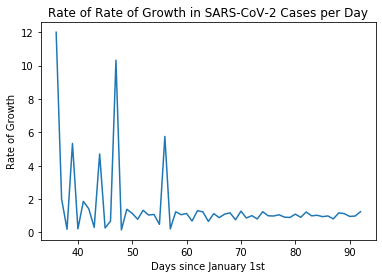

In [124]:
bb = 35
plt.plot(range(len(new_cases)-1)[b+1:], rates2[b:], label='rate^2 of growth')
# plt.plot(range(len(new_cases)-1)[b:], rates[b:], label = 'rate of growth')
plt.xlabel("Days since January 1st")
plt.ylabel("Rate of Growth")
plt.title("Rate of Rate of Growth in SARS-CoV-2 Cases per Day")
print('yeah graph oh woo yeah yeah its the graph woo its the graph yeah woo graph oh woo yeah graph')

yeah graph oh woo yeah yeah its the graph woo its the graph yeah woo graph oh woo yeah graph


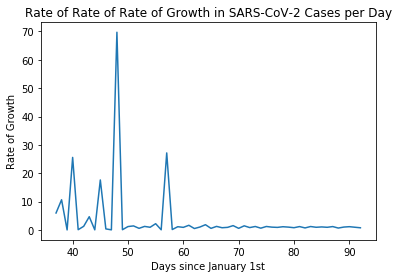

In [125]:
rates3 = []
for i in range(len(rates2)-1):
    ind = i+1
    
    if(new_cases[i]>0 and rates[ind]>0):
        rates3.append(rates2[i]/rates2[ind])
    else:
        rates3.append(0)

plt.plot(range(len(new_cases)-1)[b+2:], rates3[b:], label='rate^3 of growth')
# plt.plot(range(len(new_cases)-1)[b:], rates[b:], label = 'rate of growth')
plt.xlabel("Days since January 1st")
plt.ylabel("Rate of Growth")
plt.title("Rate of Rate of Rate of Growth in SARS-CoV-2 Cases per Day")
print('yeah graph oh woo yeah yeah its the graph woo its the graph yeah woo graph oh woo yeah graph')

i learned that taking the rate of growth of the rate of growth amplifies bigger spikes and the noise is dampened, good to know if i ever get a crappy radiation detector or some